# Exam
Rients Dalstra
346559

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
#from sklearn.pipeline import make_pipeline
#from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import warnings
# nothing to worry about here.
warnings.filterwarnings("ignore")

## Partial least squares regression.
on Galton.dat file

Using partial least squares regression to predict a kids height based on their gender and parents height. This can be a fun model to use if your baby is born and you want to know how tall he/she will get



Im using PLS over Multivariate linear regression as there is only 1 to variable to predict, therefor it would just be multiple regression instead of multivariate regression, which is not part of the assignment.

Multiple regression would work fine because the assumption is that there is no multicollinearity between the variables: gender, mother height and father height. 
But even without multicollinearity it can be an assumption that PLS will get an accurate prediction, as it will just be a linear regression.


During the making of this assignment i realized that my values i got from predictions were not accurate, therefor i attempted multiple different methods. Only to realize that it all had to do with the scaling i applied.

I then decided to not scale the data as scaling for regression doesn't matter and is not neccessary, and I spent to much time trying to reverse scale the output.


In [2]:
# loading in the data set
reg =  pd.read_csv('galton.dat', sep='\t')
reg

family  father  mother gender  height  kids  male  female
0        1    78.5    67.0      M    73.2     4   1.0     0.0
1        1    78.5    67.0      F    69.2     4   0.0     1.0
2        1    78.5    67.0      F    69.0     4   0.0     1.0
3        1    78.5    67.0      F    69.0     4   0.0     1.0
4        2    75.5    66.5      M    73.5     4   1.0     0.0
..     ...     ...     ...    ...     ...   ...   ...     ...
893   136A    68.5    65.0      M    68.5     8   1.0     0.0
894   136A    68.5    65.0      M    67.7     8   1.0     0.0
895   136A    68.5    65.0      F    64.0     8   0.0     1.0
896   136A    68.5    65.0      F    63.5     8   0.0     1.0
897   136A    68.5    65.0      F    63.0     8   0.0     1.0

[898 rows x 8 columns]

In [3]:
# the features used to make the prediction will be stored in X
# Only the column male is used as a 1 in male will 100% correlate to a 0 in female
# The variable that will be predicted will be stored in y.
X = reg[['mother','father','male']]
y = reg['height']

Text(0.5, 1.0, 'height MSE score')

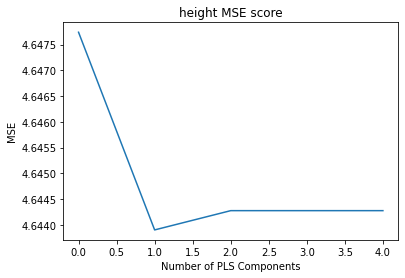

In [4]:
#define cross-validation method
# This method will check how much components used by the model will give the best accurate results.
# However since there are only 3 features this doesnt have to calculate many options.

# I am using the mean squared error score to evaluate the model. 
# taking the mean sqaured error works better than just taking the mean error as it will deal with outliers better.
# Later on i will transform this back to the root mean squared error to see on average how much my models prediction deviates from reality


cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=42)

mse = []
n = len(X)


# Calculate MSE using cross-validation, adding one component at a time
# However there are only 3 variables used for prediction so it doesnt have that many options.

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X, y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('height MSE score')

# The plot shows that using 1 component gives the least error, altough the differences are very very minimal that it does not really matter.

The plot shows that the all components have almost the same MSE as the difference is very small. This implies that there will not be a lot of differences in choosing either 1 , 2 or 3 components.

In [5]:
#split the dataset into training (80%) and testing (20%) sets
# This is done so that the accuracy of the model can be evaluated.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

#calculating the Root Mean squared error
pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

pls1_error = np.sqrt(mean_squared_error(y_test, pls.predict(X_test)))

pls1_error
# an average 2 cm deviation makes an pretty accurate model

2.0737412840653087

In [6]:
# putting the predicted results into a dataframe next to the actual results.
# As seen in the table the results are fairly accurate.
results = pd.DataFrame()
results['prediction PLS'] = pd.DataFrame(pls.predict(X_test))
results['actual'] = pd.DataFrame(y_test.values)
results

prediction PLS  actual
0         62.591560    65.0
1         65.895520    66.5
2         64.742116    65.0
3         67.076925    66.0
4         64.683405    63.5
..              ...     ...
175       66.741834    68.5
176       64.095774    64.0
177       69.917619    69.0
178       65.348173    69.2
179       68.705504    71.2

[180 rows x 2 columns]

~~The results and predictive power of the model are horrible, It assumes every kid is very tall which is unlikely. especially since the date removes the meter yet it still gives values near the two hundreds. 
Below i will create a multiple linear regression model to see if it predicts more accurately~~

I removed the scaling features from all the code because there is simply no need for scaling in most cases of regression and the results are more accurate, and make actual sense.

However since i had already made the multiple linear model i will leave it in to  compare the results. The same will apply to the PLS model that doesnt use gender as a feature.




In [7]:
#split the dataset into training (80%) and testing (20%) sets, keeping the randomstate the same to make sure the data doesnt differ from the other made models
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

#calculate RMSE
MLR = LinearRegression()
# I scale the data because the heiht values are different from the boolean values.
# removing the scaling makes the mean square error go up by a lot, but make the acutal predictions more accurate
MLR.fit(X_train, y_train)

mlr_error = np.sqrt(mean_squared_error(y_test, MLR.predict(X_test)))
mlr_error


2.06433487066239

In [8]:
# The Mlr model has a better score but by a negilible margin. They are both equally accurate.
pls1_error - mlr_error

0.009406413402918812

In [9]:
prediction = MLR.predict(X_test)
results['prediction MLR'] = pd.DataFrame(prediction)
results

prediction PLS  actual  prediction MLR
0         62.591560    65.0       62.617536
1         65.895520    66.5       65.814832
2         64.742116    65.0       64.692153
3         67.076925    66.0       66.954997
4         64.683405    63.5       64.643296
..              ...     ...             ...
175       66.741834    68.5       66.623799
176       64.095774    64.0       64.076351
177       69.917619    69.0       69.919860
178       65.348173    69.2       65.277921
179       68.705504    71.2       68.748324

[180 rows x 3 columns]

~~The linear regression model returns equally wrong values suggesting that the mistake is either in the data/coding or that it simply not possible to use this data for coding. I believe it has something to do with the scaling applied but as of typing this i have not found a way to revert it.
Below i will give it one more attempt this time simply only predicting the height of a kid based on the height of its parents, removing the gender variable and removing the scaling~~

Below i have made another PLS model, this one predicts the height based on only the parents height and not the childs gender. The assumption is that this model will be less accurate as it uses less features.

In [10]:
# the features used to make the prediction will be stored in X
# The variable that will be predicted will be stored in y.
X2 = reg[['mother','father']]
y2 = reg['height']

In [11]:
#split the dataset into training (80%) and testing (20%) sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=0) 

# Since im using two features to predict i will use two components.
# As there isnt any multicorrelinity between the features the two components should work fine.
pls = PLSRegression(n_components=2)
# Because both features are the same measurement there is no need for scaling.
pls.fit(X_train2, y_train2)
# calculating the Root mean squared error. 
np.sqrt(mean_squared_error(y_test, pls.predict(X_test2)))

# As expected the mean error is higher than the model in which the gender is also used as a factor

3.426957667375075

In [12]:
results['pred PLS no gender'] = pd.DataFrame(pls.predict(X_test2))
# individual error scores for the pls model
results['PLS error'] = results['prediction PLS'] - results['actual']
# individual error scores for the pls model which doesn't use gender as feature
results['PLS noG error'] = results['pred PLS no gender'] - results['actual']
# individual error scores for the pls model which doesn't use gender as feature
results['MLR error'] = results['prediction MLR'] - results['actual']
results

# there are individual scores in which the no gender model performs better, this can for example be attributed to a individual long female throwing the model which includes gender off.

prediction PLS  actual  prediction MLR  pred PLS no gender  PLS error  \
0         62.591560    65.0       62.617536           65.357661  -2.408440   
1         65.895520    66.5       65.814832           68.473744  -0.604480   
2         64.742116    65.0       64.692153           67.361603  -0.257884   
3         67.076925    66.0       66.954997           69.576387   1.076925   
4         64.683405    63.5       64.643296           67.335960   1.183405   
..              ...     ...             ...                 ...        ...   
175       66.741834    68.5       66.623799           69.234481  -1.758166   
176       64.095774    64.0       64.076351           66.788153   0.095774   
177       69.917619    69.0       69.919860           67.431883   0.917619   
178       65.348173    69.2       65.277921           67.930494  -3.851827   
179       68.705504    71.2       68.748324           66.294100  -2.494496   

     PLS noG error  MLR error  
0         0.357661  -2.382464  
1         1.973744  -0.685168  
2         2.361603  -0.307847  
3         3.576387   0.954997  
4         3.835960   1.143296  
..             ...        ...  
175       0.734481  -1.876201  
176       2.788153   0.076351  
177      -1.568117   0.919860  
178      -1.269506  -3.922079  
179      -4.905900  -2.451676  

[180 rows x 7 columns]

In [37]:
# making the test set a bit smaller to make a visualizable plot
p_results = results[:10]

fig = plt.figure(figsize=(15,7))
#plt.figure(figsize=(30,30))
x = range(0,len(p_results))
plt.scatter(x, p_results['MLR error'])
plt.scatter(x, p_results['PLS error'])
plt.scatter(x, p_results['PLS noG error'])
plt.axhline(0, c='k', linewidth=3)
plt.grid()
plt.xlabel('predicted children')
plt.ylabel('error score')
plt.title('Comparing the error scores of 3 different models for 10 cases')
plt.show()

# This plot clearly shows the almost exact same error methods for PLS and MLR while the pls without using gender scores worse.
# A cool highlight from this graph is that the error rate between the two PLS methods stays the same.

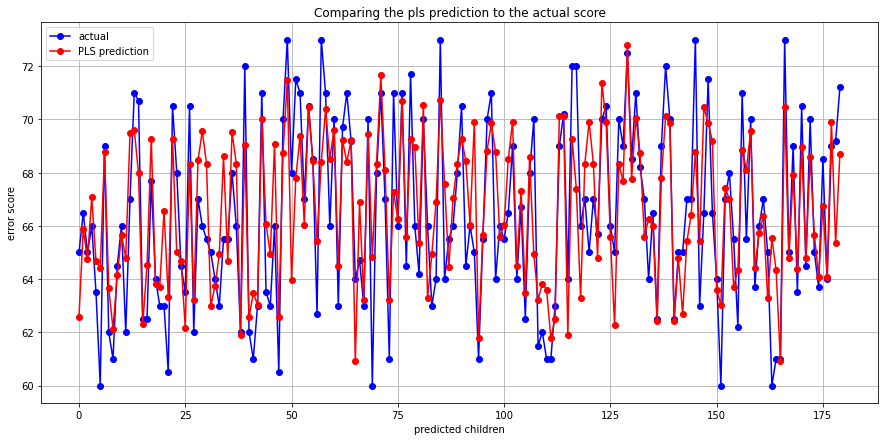

In [14]:
fig = plt.figure(figsize=(15,7))
#plt.figure(figsize=(30,30))
x = range(0,len(results))
plt.plot(results['actual'],'o-b', label= 'actual')
plt.plot(x, results['prediction PLS'], 'o-r', label= 'PLS prediction')
plt.grid()
plt.xlabel('predicted children')
plt.ylabel('error score')
plt.title('Comparing the pls prediction to the actual score')
plt.legend()
plt.show()


# Not the clearest plot but it shows that the prediction usually follows the actual score and doesn't deviate that much.

The plots and the table show that the features of mother height, father height and gender can be used to make accurate predictions on a childs height using PLS.

It is also possible to make an model that predicts the childs height only based on the parents height without knowing the gender, altough this results in a slightly less accurate model. Altough a model like this could be usefull if you want to make predictons before your baby is even born so you don't know the gender

<font color='blue'>
    The idea is not bad, but the execution is incomplete. You would need to have the R^2 for the different models to compare them (or the total deviation, or the AIC) and/or a model plot. Also, PLSR does not reduce to MLR. PLSR tries to find the principal component (by rotation) that best correlates with the regressand.

## PCA - not completed.
The connectome vector file shows brain connectivity for both men and woman.
I believe PCA would be a good technique to use to see if there are differences between men and woman in brainwaves. Since the dataset is very large, has a lot of dimensions and has variety between all connections.

It can also be assumed that there are no known underlying factors responsible for multiple brainareas, therefor factor analysis will also be less usefull than PCA.




- halfway through the PCA i realized it would not make for nice plots therefor I abandoned doing PCA on this dataset

In [15]:
con = pd.read_csv('connectome_vectorized.csv')

In [16]:
con

Unnamed: 0  0  1  2  3  4  5  6  7  8  ...  93139  93140  93141  93142  \
0            0  1  0  0  0  0  0  0  0  0  ...      0      0      1      0   
1            1  0  0  0  0  1  0  1  0  0  ...      0      0      0      1   
2            2  0  0  1  0  0  0  0  0  0  ...      0      0      0      0   
3            3  0  0  0  0  1  0  1  0  0  ...      0      0      0      0   
4            4  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
..         ... .. .. .. .. .. .. .. .. ..  ...    ...    ...    ...    ...   
91          91  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
92          92  0  0  0  0  0  0  0  0  0  ...      0      0      0      0   
93          93  0  0  1  0  1  0  0  0  0  ...      0      0      0      1   
94          94  1  1  1  0  0  0  1  0  0  ...      0      0      0      0   
95          95  0  0  0  0  1  0  0  0  0  ...      0      0      0      0   

    93143  93144  93145  93146  93147  sex  
0       0      1      0      0      0    F  
1       0      1      1      1      1    M  
2       0      1      0      0      1    M  
3       0      1      1      0      1    M  
4       0      1      1      0      1    F  
..    ...    ...    ...    ...    ...  ...  
91      1      1      0      0      1    M  
92      0      1      0      0      1    F  
93      0      1      1      1      1    F  
94      0      1      1      1      1    M  
95      0      1      1      0      0    F  

[96 rows x 93150 columns]

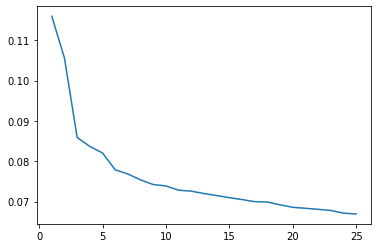

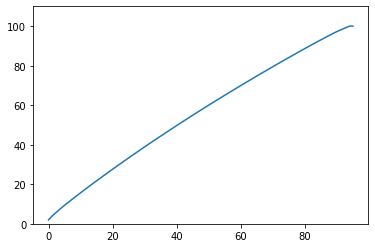

In [17]:
# removing the first 'index' colum and the last sex column
# the sex column can be used later on to color the plot
data = con.values[:,1:-1]
data -= data.mean(axis=0)
#data = data / data.std()
# since the data is in boolean values it does not have to be standardized
cov = np.cov(data.astype(float))
vals, vecs = np.linalg.eigh(cov)
# changing the order of the vals and vectors so that i get the largest ones first as these are the ones im interested in.
order = vals.argsort()[::-1]
vals = vals[order]
vecs = vecs[:, order]

plt.plot(range(1, 26), vals[:25])
plt.show()

# Cumulative percentage of eigenvalues
plt.plot(100 * vals[:100].cumsum() / sum(vals))
plt.ylim((0, 110))
plt.show()

Interpretation:
 there is not a single component that tells a lot about the data, therefor while you can use PCA to reduce the dimensionality, you will still have a lot of dimensions left.

 This will not make for any pretty plots and thats why I decide to stop the PCA on this dataset here.
 

# PCA 2

I will perform PCA on the transhydroganase files with coordinates for the different mutatations of the protein.
With PCA I expect to be able to distinguis the different groups of the mutant forms based on their coordinates over time



In [18]:
data_full = pd.read_csv('transhydrogenase.csv', compression='gzip')
# I remove the first two columns, the first column is just the index, while the second column is the type of mutation, I will use this later to color the graph
data = data_full.values[:,2:]

In [19]:
data -= data.mean(axis=0)
# since the data has already been aligned to a common frame of reference using Procrustes analysis there is no need for standardisation
#data /= std

# Getting the covariance matrix, using astype float to prevent an error from happening
cov = np.cov(data.T.astype(float))


vals, vecs = np.linalg.eigh(cov)
# changing the order of the vals and vectors so that i get the largest ones first as these are the ones im interested in.
order = vals.argsort()[::-1]
vals = vals[order]
vecs = vecs[:, order]



In [20]:
# the first 4 vectors explain most of the variance. Afterwards it gradually decreases.
plt.plot(range(1, 26), vals[:25])
plt.show()

# creating a plot that counts the cumulative % of the vals 
plt.plot(100 * vals[:20].cumsum() / sum(vals))
plt.ylim((0, 110))
plt.show()

In [21]:

# creating coordinates i can use to plot on a graph
proj = data @ vecs[:, :5]

In [22]:
# plotting the datapoints on the vectors using plotly,
# with plotly i can group the data based on colour.
# sadly this does prevent me from making a biplot/drawing arrows.
import plotly.express as px
px.scatter(proj ,x=proj[:, 0], y=proj[:, 1], color=data_full['variant'], labels={
                     "x": "PC1",
                     "y": "PC2",
                 },
                title="Principal component analysis")

In [23]:
px.scatter(proj ,x=proj[:, 0], y=proj[:, 2], color=data_full['variant'], labels={
                     "x": "PC1",
                     "y": "PC3",
                 },
                title="Principal component analysis")

In [24]:
px.scatter(proj ,x=proj[:, 1], y=proj[:, 2], color=data_full['variant'],
 labels={
                     "x": "PC2",
                     "y": "PC3",
                 },
                title="Principal component analysis")


Interpretation

The plots show that the different groups of transhydrogase clustered together based on the different components.

Since these are configurations of coordinates, the interpretation of a component is that of an overall shape change. 

Most of the components are spread in a line, showing how they change shape over the period of time they were measured.





<font color='blue'>
    Well done. The plots are now missing, but the code is correct and so is the interpretation.

## Multidimensional scaling

I will use multidimensional scaling in the form of principal coordinates analysis to see if i can group Species of birds together.

I expect PCoA to work because the different wavelengths measured can be seen as non euclidian distances. 

My expectation will be that i will see the same species of bird but with different feather measurments group together, but also groups of different species of bird that will have similiar feather characteristics like barb roundness and barbule density as mentioned in the research article.

In [25]:
tra = pd.read_excel('reflectance and transmission spec measurements.xlsx')
tra.head(1)

wavelength  AacuW_B_Splice17_1.txt  AacuW_B_Splice17_2.txt  \
0         300                13.67375                 12.7625   

   AacuW_B_Splice17_3.txt  AacuW_W_Splice17_1.txt  AacuW_W_Splice17_2.txt  \
0                 13.0275                15.46875                14.43375   

   AacuW_W_Splice17_3.txt  AclyW_B_Splice17_1.txt  AclyW_B_Splice17_2.txt  \
0                14.43375                11.45375                  10.155   

   AclyW_B_Splice17_3.txt  ...  TmelW_B_Splice17_3.txt  \
0                 10.9775  ...                 12.1275   

   TmelW_W_Splice17_1.txt  TmelW_W_Splice17_2.txt  TmelW_W_Splice17_3.txt  \
0                16.18875                  17.625                18.41125   

   TmigW_B_Splice17_1.txt  TmigW_B_Splice17_2.txt  TmigW_B_Splice17_3.txt  \
0                10.31375                    9.54                10.95625   

   TmigW_W_Splice17_1.txt  TmigW_W_Splice17_2.txt  TmigW_W_Splice17_3.txt  
0                   17.21                20.26375                 16.7575  

[1 rows x 439 columns]

In [26]:
# I set the wavelenth as the index so i can transpose the dataframe.
tra = tra.set_index(['wavelength'])
tra.head(1)


AacuW_B_Splice17_1.txt  AacuW_B_Splice17_2.txt  \
wavelength                                                   
300                       13.67375                 12.7625   

            AacuW_B_Splice17_3.txt  AacuW_W_Splice17_1.txt  \
wavelength                                                   
300                        13.0275                15.46875   

            AacuW_W_Splice17_2.txt  AacuW_W_Splice17_3.txt  \
wavelength                                                   
300                       14.43375                14.43375   

            AclyW_B_Splice17_1.txt  AclyW_B_Splice17_2.txt  \
wavelength                                                   
300                       11.45375                  10.155   

            AclyW_B_Splice17_3.txt  AclyW_W_Splice17_1.txt  ...  \
wavelength                                                  ...   
300                        10.9775                   12.38  ...   

            TmelW_B_Splice17_3.txt  TmelW_W_Splice17_1.txt  \
wavelength                                                   
300                        12.1275                16.18875   

            TmelW_W_Splice17_2.txt  TmelW_W_Splice17_3.txt  \
wavelength                                                   
300                         17.625                18.41125   

            TmigW_B_Splice17_1.txt  TmigW_B_Splice17_2.txt  \
wavelength                                                   
300                       10.31375                    9.54   

            TmigW_B_Splice17_3.txt  TmigW_W_Splice17_1.txt  \
wavelength                                                   
300                       10.95625                   17.21   

            TmigW_W_Splice17_2.txt  TmigW_W_Splice17_3.txt  
wavelength                                                  
300                       20.26375                 16.7575  

[1 rows x 438 columns]

In [27]:
# because I want to know the grouping of the different species, and not the wavelenghts. I transpose the dataframe
tra = tra.T
tra.head(1)

wavelength                  300        302        304        306        308   \
AacuW_B_Splice17_1.txt  13.67375  14.103333  14.608824  14.941905  15.787273   

wavelength                   310        312        314        316        318   \
AacuW_B_Splice17_1.txt  16.626818  17.571364  18.882273  19.949091  21.080952   

wavelength              ...     2082     2084    2086    2088     2090   2092  \
AacuW_B_Splice17_1.txt  ...  44.1825  44.4625  44.574  44.794  44.9075  45.07   

wavelength                 2094   2096     2098    2100  
AacuW_B_Splice17_1.txt  45.2125  45.33  45.4375  45.476  

[1 rows x 901 columns]

In [28]:
# calculating the distance matrix
# the distance matrix is a symetrical matrix showing the distance between the datapoints
values = tra.values
distmat = ((values[:, None] - values[None]) ** 2).sum(axis=2)
pd.DataFrame(distmat)

0              1              2             3             4    \
0         0.000000    1113.043166     546.498705  6.416720e+05  6.125334e+05   
1      1113.043166       0.000000     780.278953  5.969929e+05  5.685394e+05   
2       546.498705     780.278953       0.000000  6.390076e+05  6.094251e+05   
3    641671.984018  596992.914511  639007.594997  0.000000e+00  5.101596e+02   
4    612533.445562  568539.360793  609425.144385  5.101596e+02  0.000000e+00   
..             ...            ...            ...           ...           ...   
433   98720.153862  114818.639250   97189.813751  1.225258e+06  1.182868e+06   
434  123744.463191  143427.014153  124080.097572  1.321792e+06  1.278685e+06   
435  779568.159717  732256.676894  774448.104105  6.123561e+04  6.159839e+04   
436  888613.328129  838936.943196  885229.947981  6.529940e+04  6.919248e+04   
437  875571.764148  826038.725114  871808.747841  6.624258e+04  6.936328e+04   

              5              6              7              8             9    \
0    6.125334e+05   21921.092364   25908.127162   40274.617245  5.130295e+05   
1    5.685394e+05   13658.648233   17154.253030   28877.130383  4.708663e+05   
2    6.094251e+05   19000.388332   24207.644715   37837.352720  5.073662e+05   
3    5.101596e+02  458853.364920  427404.016152  383326.625224  1.887487e+04   
4    0.000000e+00  432601.685280  402565.893894  359518.399334  1.385026e+04   
..            ...            ...            ...            ...           ...   
433  1.182868e+06  185578.178484  206395.143039  240897.680804  1.026318e+06   
434  1.278685e+06  227456.885983  247391.647323  285426.401559  1.118433e+06   
435  6.159839e+04  569897.794936  547203.430128  505860.413828  9.413418e+04   
436  6.919248e+04  668562.923930  640351.770626  595173.227473  1.167110e+05   
437  6.936328e+04  654806.605879  626999.565827  582028.067582  1.118336e+05   

     ...           428           429           430           431  \
0    ...  5.331381e+04  9.122247e+05  9.942368e+05  1.027017e+06   
1    ...  6.678531e+04  8.620674e+05  9.428271e+05  9.743881e+05   
2    ...  5.365595e+04  9.106652e+05  9.932200e+05  1.026369e+06   
3    ...  1.061638e+06  4.965601e+04  7.554374e+04  7.169474e+04   
4    ...  1.023351e+06  5.560759e+04  8.311893e+04  8.046620e+04   
..   ...           ...           ...           ...           ...   
433  ...  8.886884e+03  1.580044e+06  1.685196e+06  1.734206e+06   
434  ...  1.590929e+04  1.693793e+06  1.802483e+06  1.851136e+06   
435  ...  1.212964e+06  2.036593e+04  2.765380e+04  3.914800e+04   
436  ...  1.354537e+06  6.347734e+03  8.246580e+03  1.512476e+04   
437  ...  1.336632e+06  9.365113e+03  1.228903e+04  1.998593e+04   

              432           433           434           435           436  \
0    7.507957e+04  9.872015e+04  1.237445e+05  7.795682e+05  8.886133e+05   
1    9.009496e+04  1.148186e+05  1.434270e+05  7.322567e+05  8.389369e+05   
2    7.487593e+04  9.718981e+04  1.240801e+05  7.744481e+05  8.852299e+05   
3    1.144827e+06  1.225258e+06  1.321792e+06  6.123561e+04  6.529940e+04   
4    1.104480e+06  1.182868e+06  1.278685e+06  6.159839e+04  6.919248e+04   
..            ...           ...           ...           ...           ...   
433  2.440954e+03  0.000000e+00  3.914466e+03  1.377419e+06  1.533176e+06   
434  6.613336e+03  3.914466e+03  0.000000e+00  1.492040e+06  1.649920e+06   
435  1.301412e+06  1.377419e+06  1.492040e+06  0.000000e+00  6.394329e+03   
436  1.449544e+06  1.533176e+06  1.649920e+06  6.394329e+03  0.000000e+00   
437  1.428824e+06  1.511405e+06  1.628131e+06  4.910499e+03  8.779091e+02   

              437  
0    8.755718e+05  
1    8.260387e+05  
2    8.718087e+05  
3    6.624258e+04  
4    6.936328e+04  
..            ...  
433  1.511405e+06  
434  1.628131e+06  
435  4.910499e+03  
436  8.779091e+02  
437  0.000000e+00  

[438 rows x 438 columns]

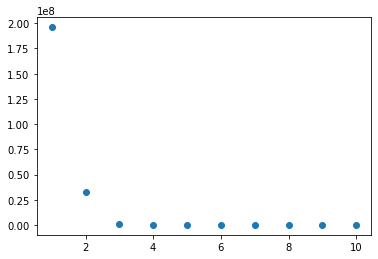

In [29]:
# calculating the eigenvalues and vectors of the distance matrix.
# these vectors and values can then be used to calculate the principal coordinates

# centering the distance matrix so that the eigenvalues and vectors can be calculated.
m = distmat.mean(axis=0)
A = -0.5 * (distmat - m[None, :] - m[:, None] + m.mean())

# Calculating the eigenvalues and vectors from the standardized distance matrix
vals, vecs = np.linalg.eigh(A)
# reversing the order of the vectors because I want the highest ones first.
vecs = vecs[:, ::-1]
vals = vals[::-1]

# plotting a scree plot of the eigenvalues
plt.scatter(np.arange(1, 11), vals[:10])
plt.show()

# Cumulative percentage of eigenvalues
plt.plot(100 * vals[:10].cumsum() / sum(vals))
plt.ylim((0, 110))
plt.show()

# The two plots show that the 1st two components already tell almost everything about the data.

In [30]:
# Compute the Principal Coordinates Analysis
# since the first two vectors already explain almost 100% of the data, it is all I need to use.

# the code below uses the distance vectors and values to compute new coordinates for all the the datapoints.

my_pcoa = vecs[:, :2] * vals[:2]**0.5

In [31]:
s = tra.index
# for i in range(len(s)):
#     print(s[i][:5])

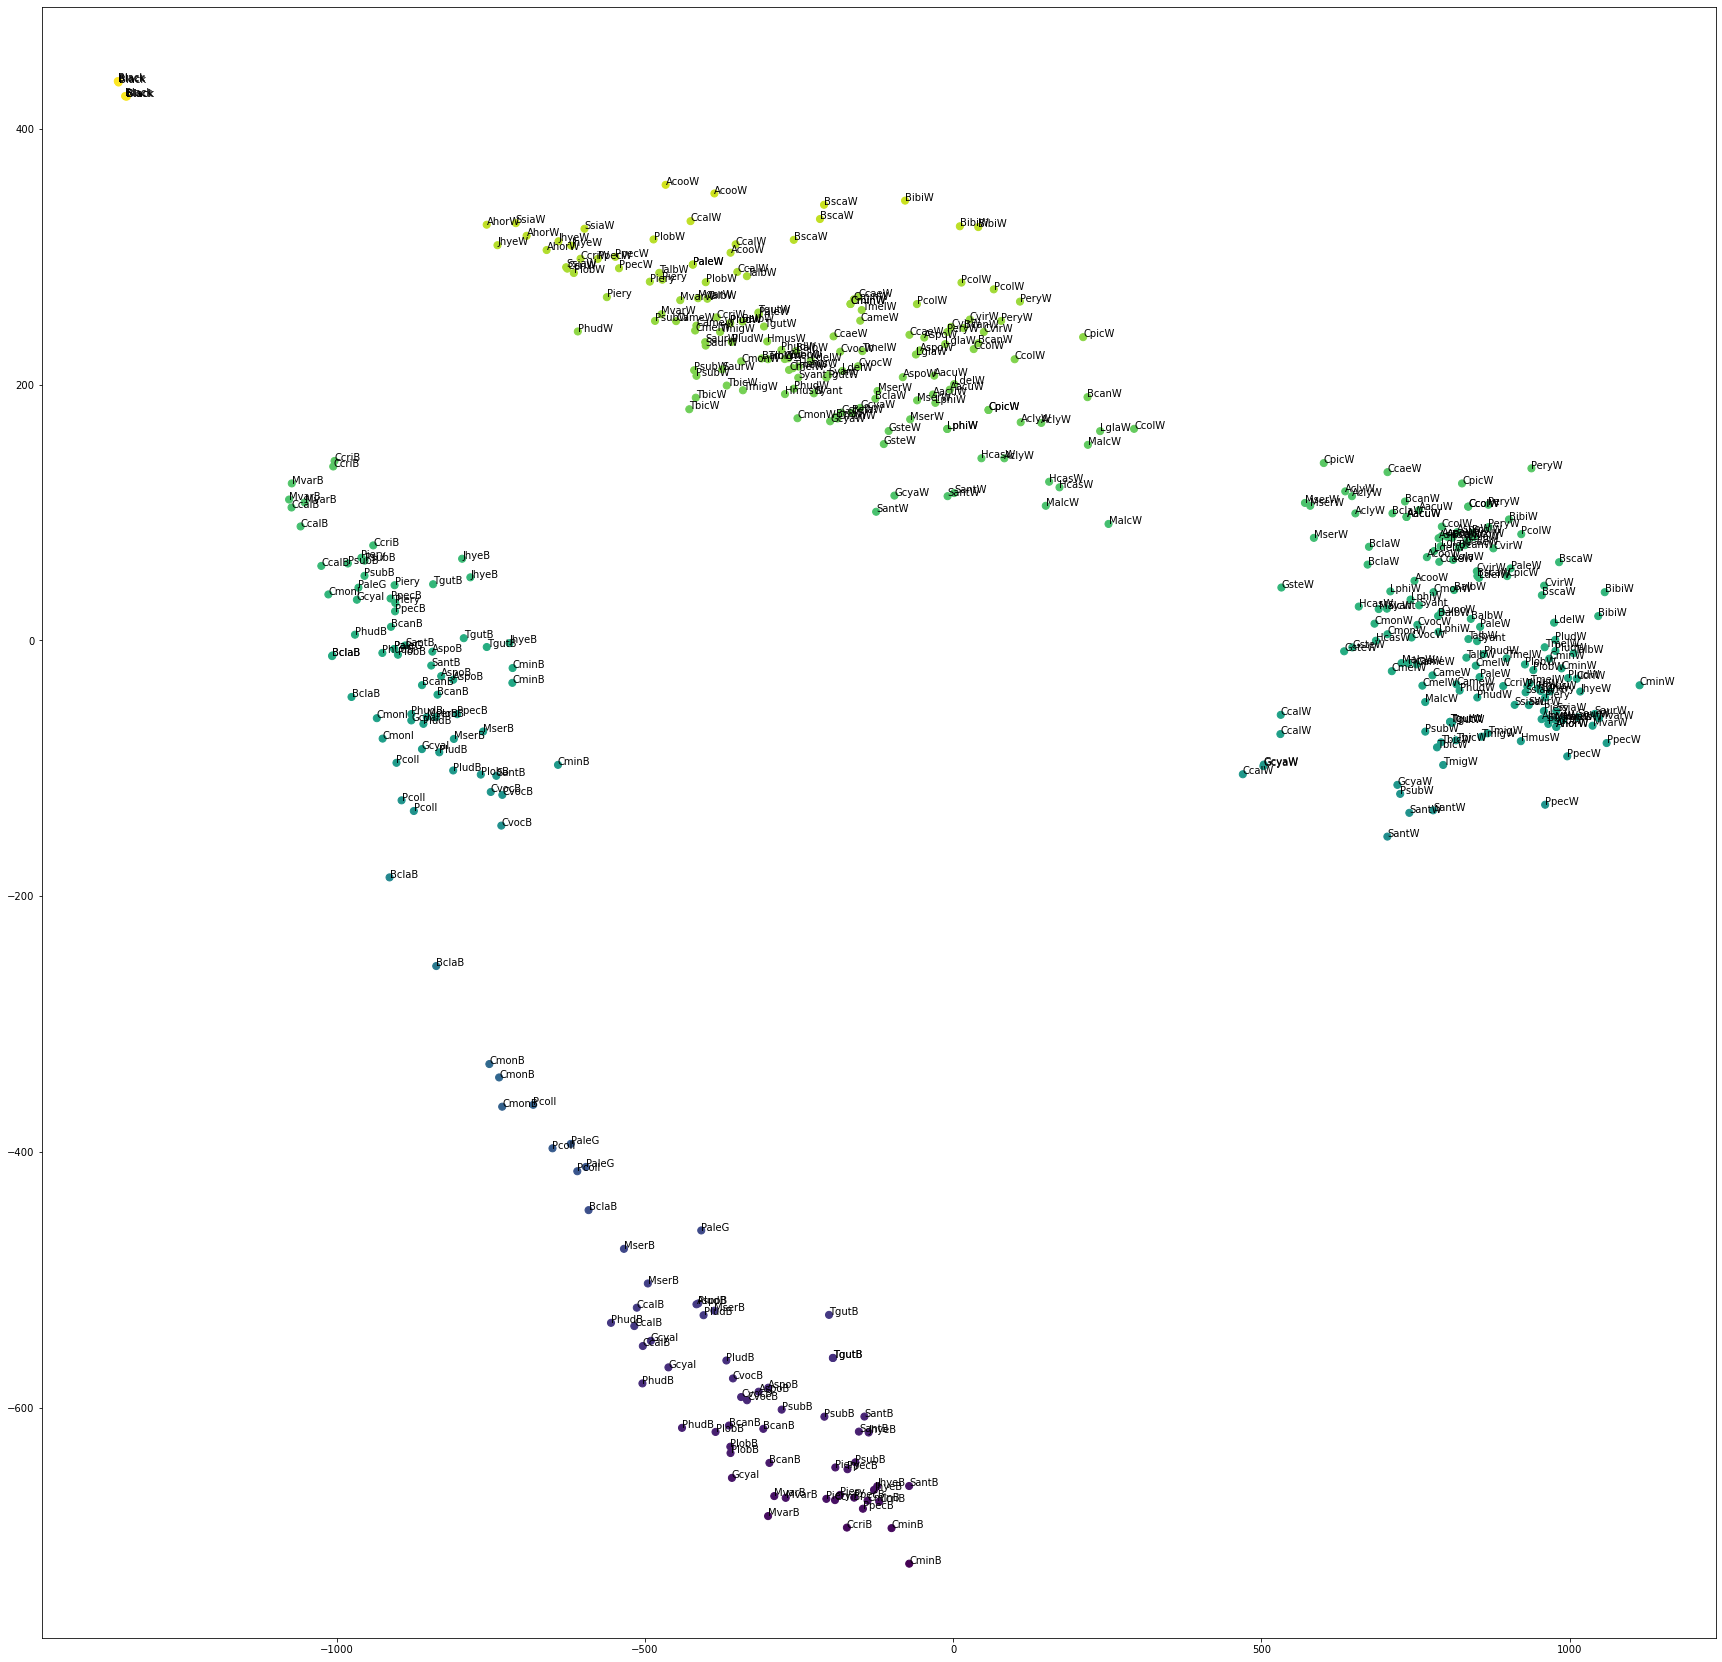

In [32]:
# Plotting the coordinates across the two distance vectors.
fig, ax = plt.subplots(figsize=(30,30))
#ax.set_aspect(1)
plt.scatter(*my_pcoa[:, [0, 1]].T, s=50,c=my_pcoa[:, 1])

# a loop to give the species label to each dot. 
# it is not the most reabable but i believe it gets the picture accross.
# I tried doing it with each species a color but i could not manage to code this, however this would have been clearer.
# since the bird species are also shortend i could not google the actual species to see if they indeed match on feather charactericts but i assume they do.

i = 0
for (x,y) in my_pcoa[:, [0, 1]]:
    plt.text(x, y, tra.index[i][:5])
    i += 1


plt.show()

### Plot results
The multidimensional scaling shows clear results grouping between the bird species.
While the text is slighlty it hard to read it still shows that most species group together.

Also the two 'species' black which i believe stand for black feathers are far away from all the white feathered species which makes a lot of sense as they definetily reflect differently. This does somewhat of a reference point as data points the furthest away from black will probably reflect light the best, knowning that the colour black absorbs light.

While i dont know individual bird species, I think this plot can be used to group them together for further research or to find more common characteristics between them. 

The research article named that Feathers with rounder barbs and more closely situated barbules reflect light better. If you were to look up the individual species these are probably grouped together in the map




<font color='blue'>
    Nice!

## PCA 3   
Last one. Ignore this one if my grade is already a pass :) altough if its a fail this one won't improve the grade I think.

Multi dimensionality reduction is one way to see different groups of the birds, I will now attempt PCA to see the groupings.

My assumption is that it will look very similar to PCoA, as both almost do the same thing.


In [33]:
PCA_dat = pd.read_excel('reflectance and transmission spec measurements.xlsx')

In [34]:
# i follow the same steps i used in PCoA to transpose the dataset
data = PCA_dat.set_index(['wavelength'])
data = data.T

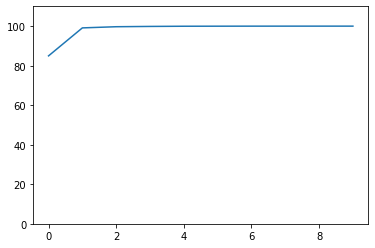

In [35]:
# as for all PCA the data should be centered.
data -= data.mean(axis=0)
# because all the data are measurements of light reflections they should not be standardized
#data /= std

# creating the covariance matrix.
cov = np.cov(data.T)

# obtaining the eigenvalues & vectors
vals, vecs = np.linalg.eigh(cov)
# reversing the sorting of the vals and vectors to get the largest one first, as this is the one im interested in.
order = vals.argsort()[::-1]
vals = vals[order]
vecs = vecs[:, order]

# Plotting the top 10 values.
plt.scatter(range(1, 11), vals[:10])
plt.show()

# Cumulative percentage of eigenvalues
plt.plot(100 * vals[:10].cumsum() / sum(vals))
plt.ylim((0, 110))
plt.show()

# Both pcoa and pca scree plots look exactly the same.
# This is because I did the exact same steps, except for pcoa i used a distance matrix instead of the covariance matrix.

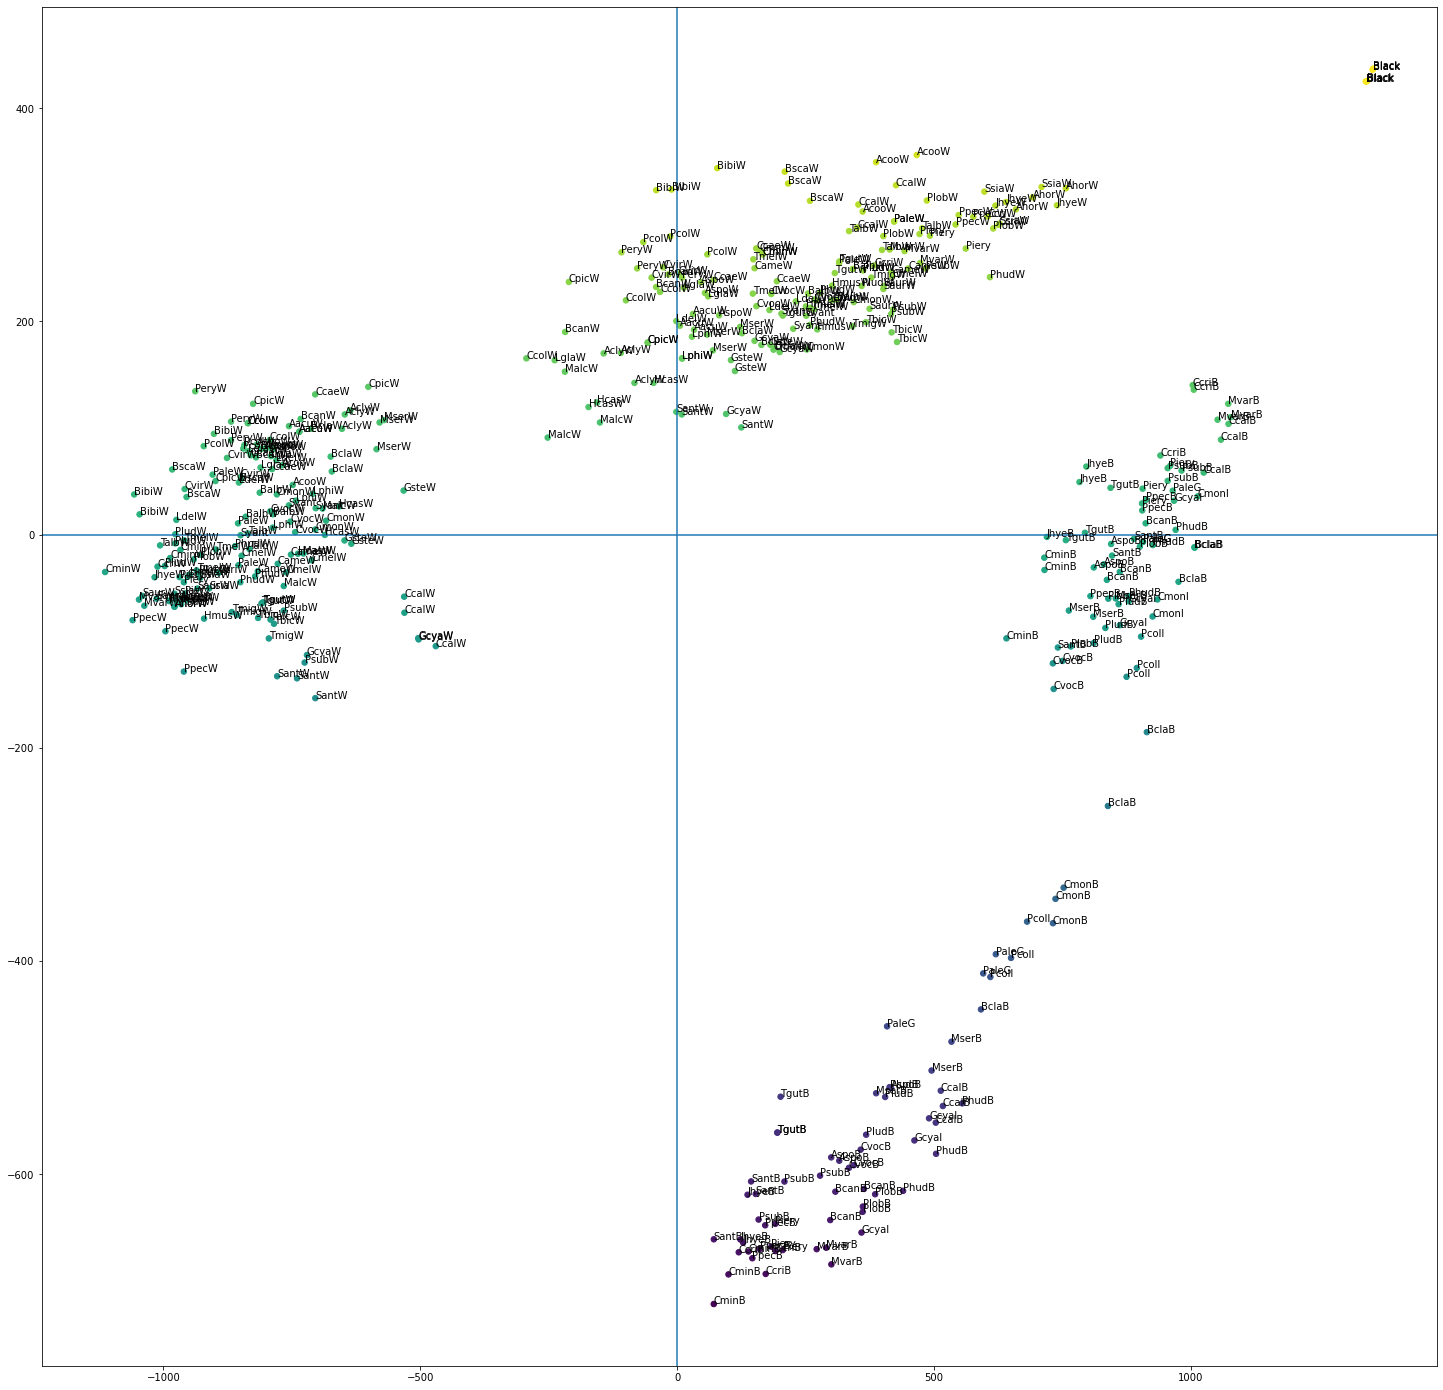

In [36]:
# Projection of data onto the components aka rotation of data
fig, ax = plt.subplots(figsize=(25,25))

projections = np.dot(data,vecs[:, :2])

plt.scatter(projections[:,0], projections[:,1], c=projections[:, 1], s=30)
plt.axhline(0)
plt.axvline(0)

i = 0
for (x,y) in projections[:, [0, 1]]:
    plt.text(x, y, data.index[i][:5])
    i += 1
    
plt.show()


It shows the same as the principal coordinates analysis, which makes sense as they mostly do the same thing, and just have slightly different use cases and methods.


Since the data maps out light reflection at different wave lengths on the feathers of different species, the intepretation of the components is that it groups the species based on how well they reflect the light.

The components show a combination of how well a feather reflects the light but also on which light level.


In hindsight doing PCoA on this dataset might not have been entirly precise as im not sure if the different wavelenghts can be considered different coordinates. Therefor i might have just done pca twice, in slightly different ways. 



